<a href="https://colab.research.google.com/github/rohanroney/Boston_Housing_Data_Analysis/blob/main/Rohan_Roney%20-%20Linear_Regression%20-%20%20Understanding%20Boston%20Housing%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g67Xxr4ttga2UW_GV3JklT60sY5z9fn-D9I98r63revjwqLfIlEDPc


In [ ]:
# Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 3/Week 1/Day 3/housing.csv", delim_whitespace=True,header=None, 
                 names = ["CRIM","ZN", "INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B-1000","LSTAT","MEDV"] )

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B-1000,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
# Understanding the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


We realise the data does not have any missing values as such.

### Certain Visualizations to better understand data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


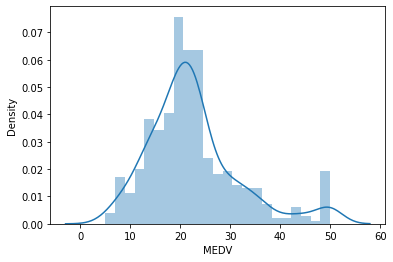

In [ ]:
# Plotting the target variable MEDV distribution
sns.distplot(df['MEDV'])
plt.show()

We can observe from the above distribution plot that MEDV feature does follow somewhat of a <b>normal distribution</b>. However, we see there are certain outliers as well which can be observed.

Let us try and observe the correlation between all of the features that we are trying to look into. This can be best understood thorough a co-relation heatmap.

Trying to understand the distribution of all other features as well pairwise.

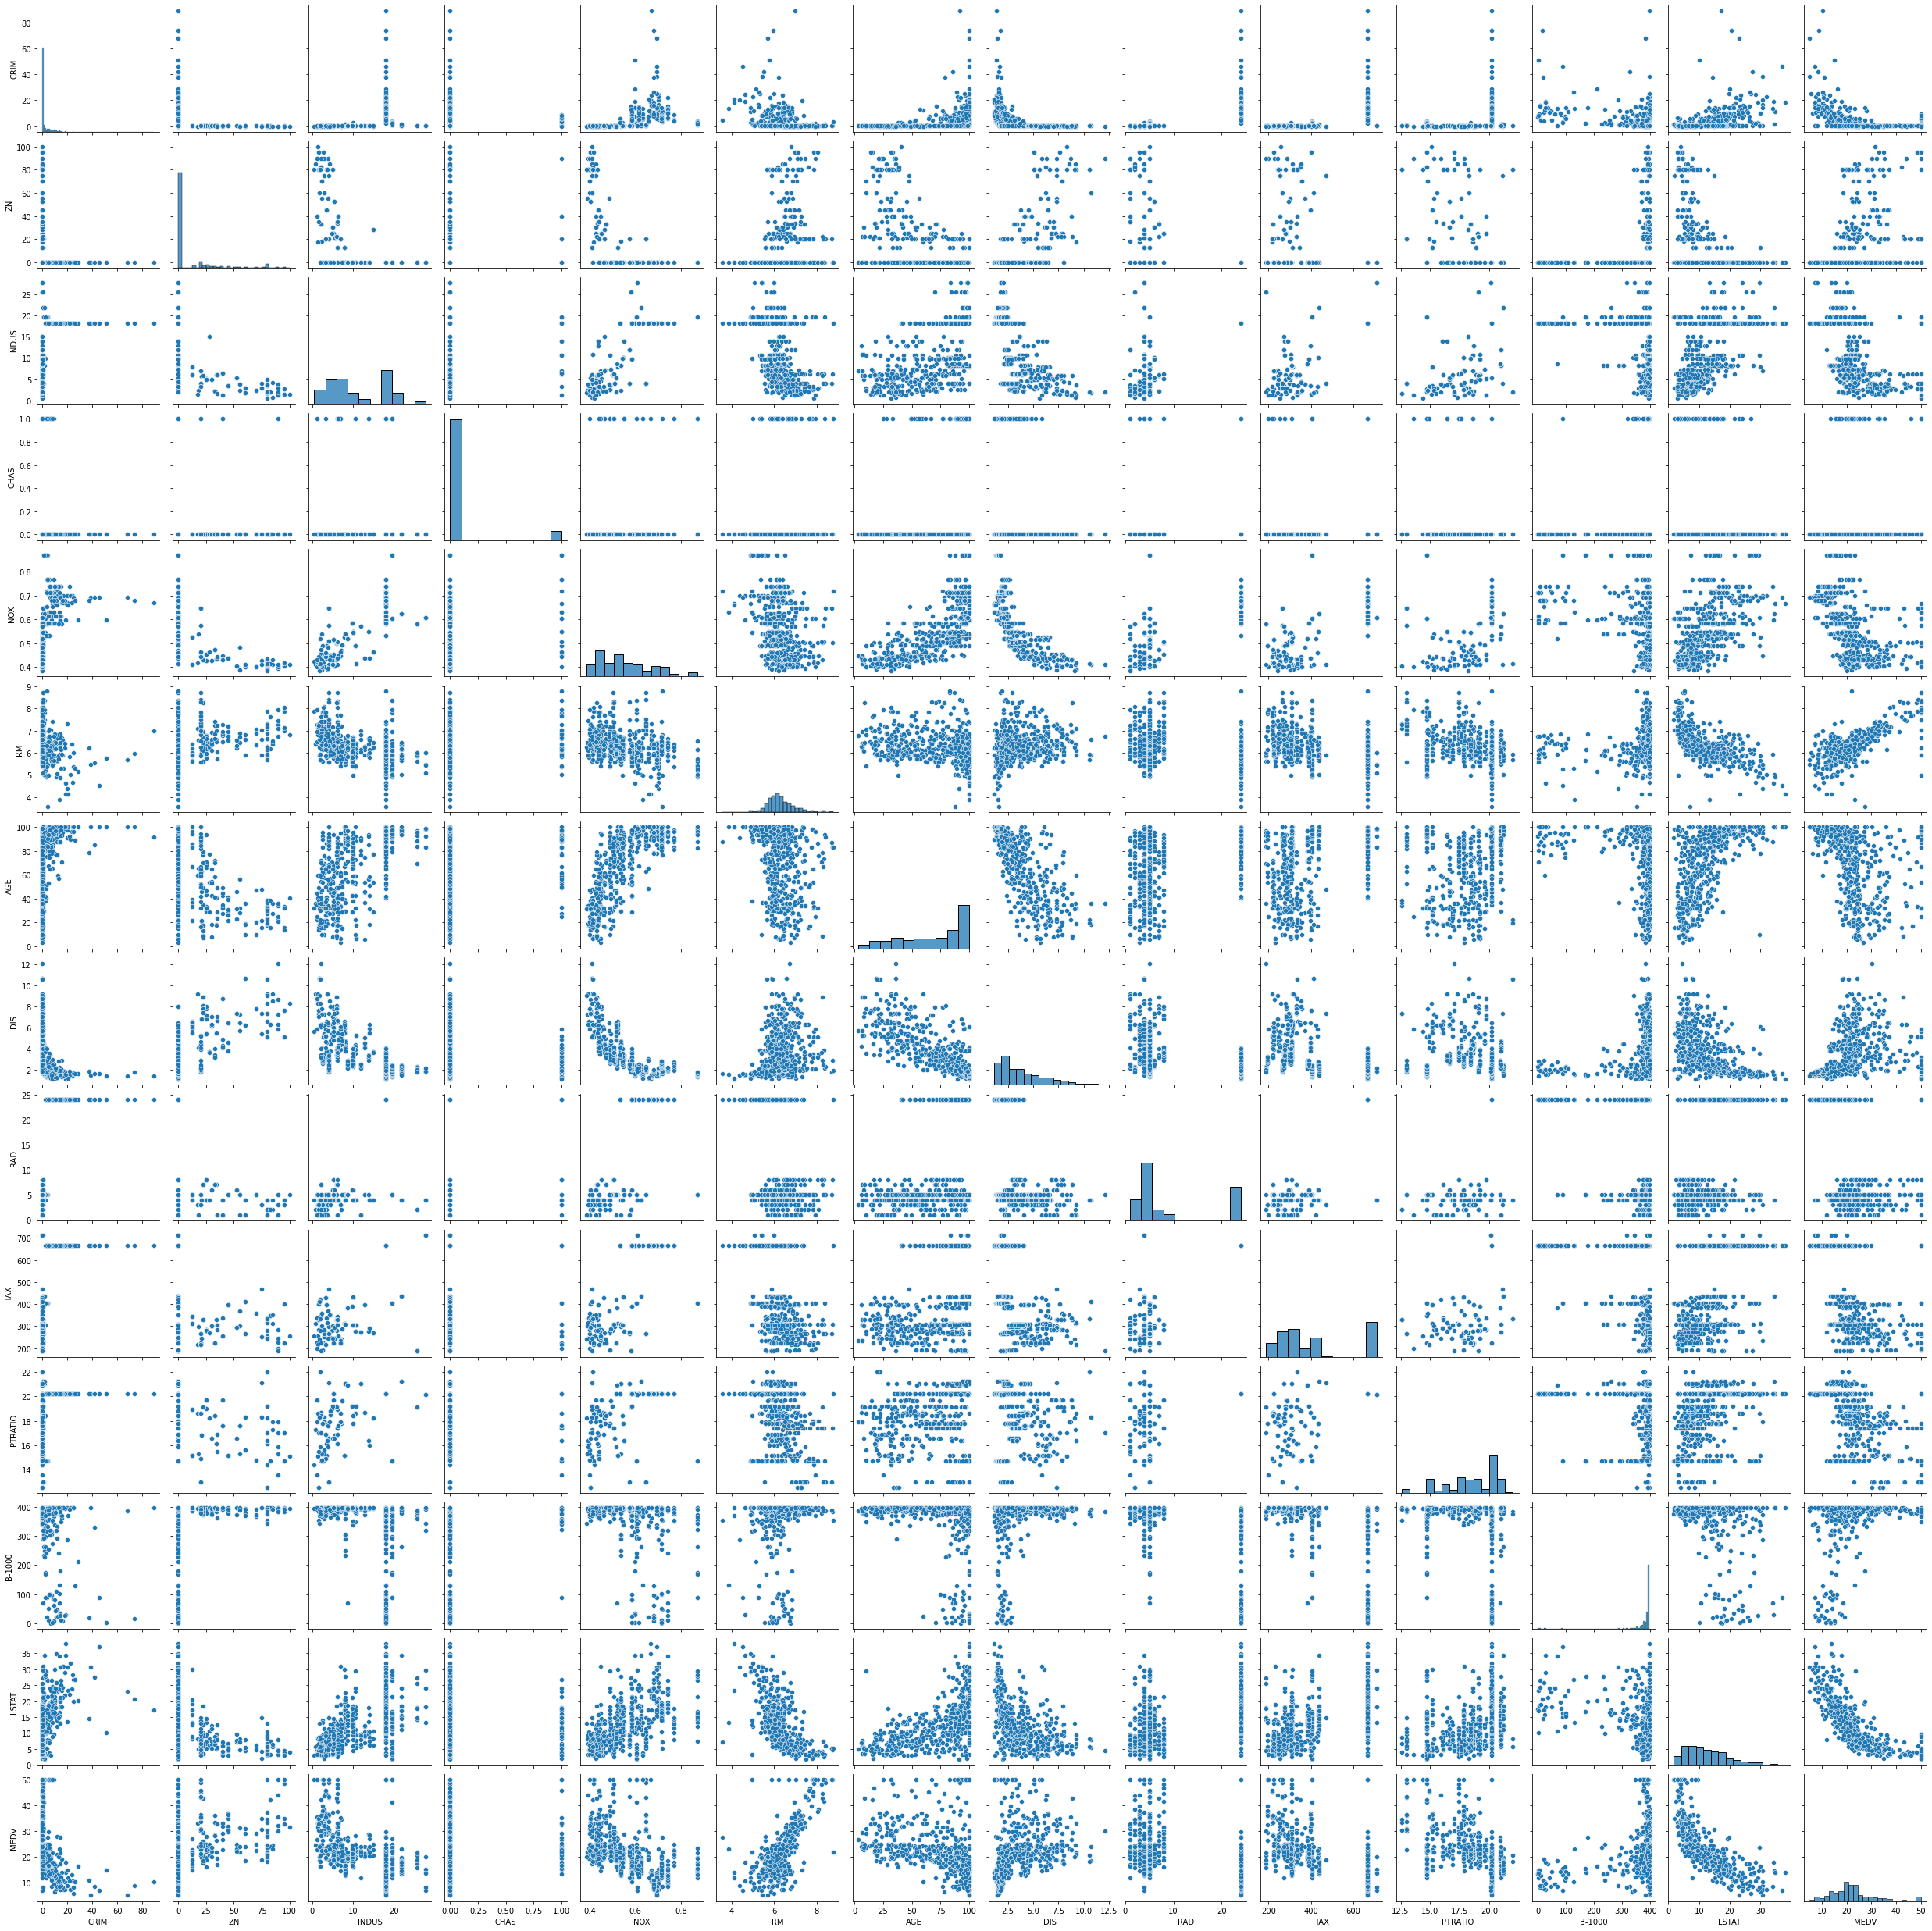

In [ ]:
sns.pairplot(df)

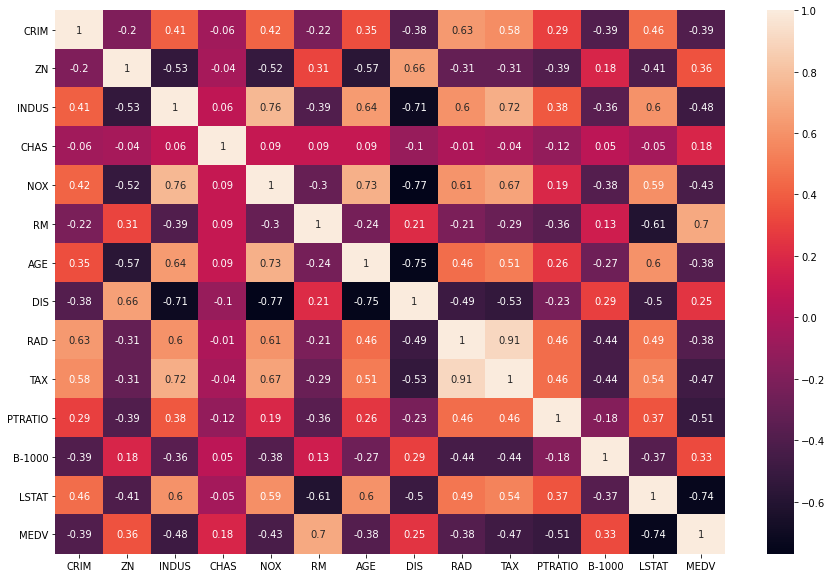

In [ ]:
correlation_matrix = df.corr().round(2)
plt.subplots(figsize=(15,10))

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)



1.   To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74). We can also say that PTRATIO has a moderate negative correlation with MEDV(-0.51).

2.   An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.



Based on the above information we have basis to conclude that 3 features - RM, LSTAT and PTRATIO affect the target variable and hence for further analysis we will be concentrating on these features. Using scatter plots to understand relation between these individual features with the target variable:

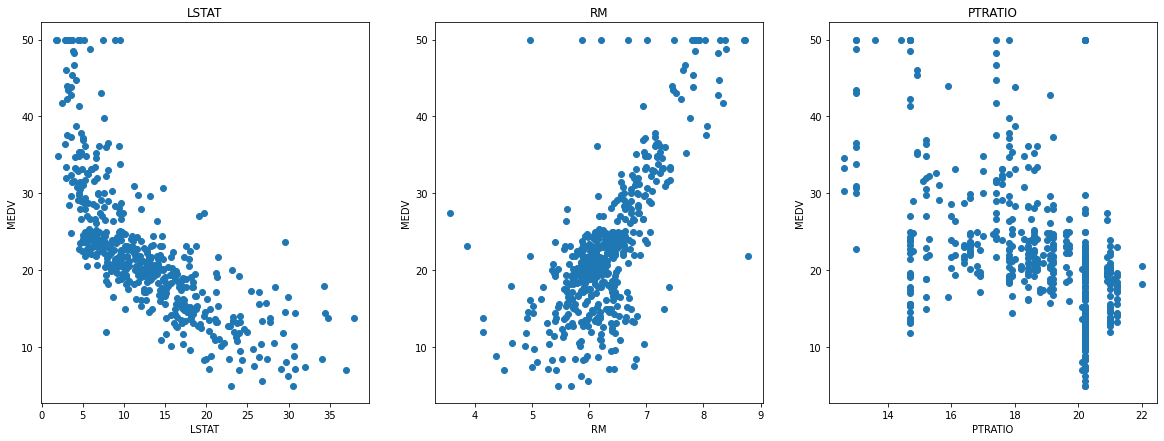

In [ ]:
plt.figure(figsize=(20, 7))

features = ['LSTAT', 'RM','PTRATIO']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')



*   The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

*  The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.


*   PT RATIO we can safely understand is not correlated and we would need to discount this feature for our further calculations.




Understanding a bit more about about these feature distributions and trying to fit a best fit line based on the individual features.

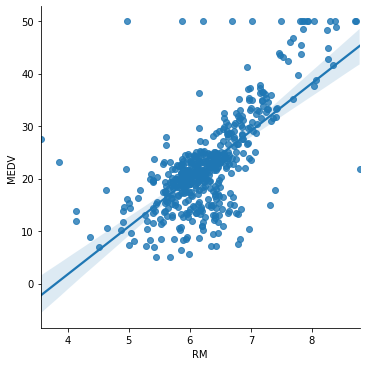

In [ ]:
sns.lmplot(x='RM',y='MEDV',data=df)

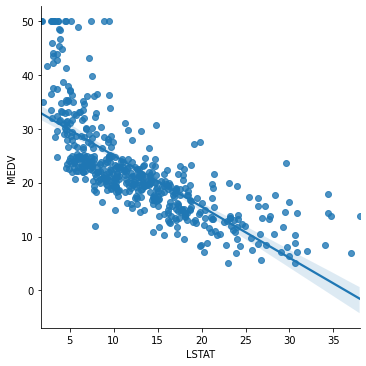

In [ ]:
sns.lmplot(x='LSTAT',y='MEDV',data=df)

## Conclusion

From the analysis we can conclude that for linear regression LSTAT and RM are the most important features as they have very strong corelation with the target variable MEDV. This is quite intuitive as lower value of LSTAT means that lower the percentage of lower status groups in the locality higher is the chance of medium and high class individals set up their homes in the locality. Statistically its obseved that lower status population genereally are more involved in crimes etc. making it apprehensive for people. Also high RM means more people are trying toset up homes with more rooms and hence increasing capacity drastically.

We also observed that rest of the features have high level of multi-collinearity among themselves which in turn rejects its use in the linear regression model as well.


